# Exercise 1 of Logistic Regression - Admission into graduate school

## Downloading the dataset

In [5]:
!curl -L -o ./binary.dta https://stats.idre.ucla.edu/stat/stata/dae/binary.dta

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   261  100   261    0     0    250      0  0:00:01  0:00:01 --:--:--   250
100  7312  100  7312    0     0   3728      0  0:00:01  0:00:01 --:--:-- 12026


## Importing Python Modules

In [7]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

## Importing the Dataset

In [8]:
df = pd.read_stata('binary.dta')

## Head of the Dataset

In [11]:
df.head()

,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


## Checking columns in the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    float32
 1   gre     400 non-null    float32
 2   gpa     400 non-null    float32
 3   rank    400 non-null    float32
dtypes: float32(4)
memory usage: 6.4 KB


In [13]:
df.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [ ]:
feature_columns = ["gre", "gpa", "rank"]
x = df[feature_columns]
y = df.admit

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(320, 4)

(320,)

(80, 4)

(80,)

In [17]:
model = LogisticRegression(max_iter=1000,solver="lbfgs")
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
y_pred = model.predict(x_test)

In [19]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix :',conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score :',Accuracy_score)
print('Accuracy in Percentage:',int(Accuracy_score*100), '%' )

Confusion Matrix : [[54  0]
 [ 0 26]]
Accuracy Score : 1.0
Accuracy in Percentage: 100 %


<Axes: xlabel='Predicted', ylabel='Actual'>

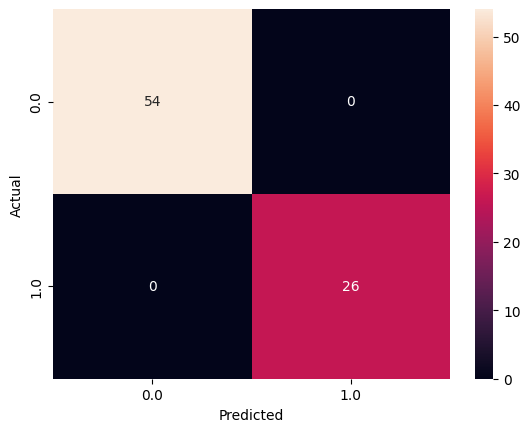

In [20]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(conf_mat, annot=True)